In [ ]:
from google.colab import files
files.upload()

Saving acquisitions_update_2021.csv to acquisitions_update_2021.csv


{'acquisitions_update_2021.csv': b'ID,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Business,Country,Acquisition Price,Category,Derived Products\r\n1,Apple,1988,Mar,Network Innovations,Software,-,-,-,-\r\n2,Apple,1988,Jun,Orion Network Systems,Computer Software,-,-,-,-\r\n3,Apple,1988,Jun,Styleware,Computer software,-,-,-,-\r\n4,Apple,1988,Jul,Nashoba Systems,Computer software,-,-,-,-\r\n5,Apple,1989,Jan,Coral Software,Computer software,-,-,-,-\r\n6,Apple,1997,Feb,NeXT,Unix-like hardware and software platform,-,404000000,-,-\r\n7,Apple,1997,Sep,Power Computing Corporation,Macintosh clones,-,110000000,-,-\r\n8,Apple,1999,Jan,Xemplar Education,Software,-,4926000,-,-\r\n9,Apple,1999,Nov,Raycer Graphics,Computer graphic chips,-,15000000,-,-\r\n10,Apple,2000,Jan,NetSelector,Internet software,-,-,-,-\r\n11,Apple,2000,Apr,Astarte-DVD Authoring Software,Software,-,-,-,-\r\n12,Apple,2000,-,SoundJam MP,Software,-,-,-,-\r\n13,Apple,2001,-,Bluefish Labs,Productivity software,-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.cm import ScalarMappable
sns.set_style('white')

In [ ]:
df = pd.read_csv('acquisitions_update_2021.csv')
df = df.replace("-", np.nan)
df['Acquisition Year'] = pd.to_numeric(df['Acquisition Year'], errors='coerce')
df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 1455 non-null   int64  
 1   Parent Company     1455 non-null   object 
 2   Acquisition Year   1427 non-null   float64
 3   Acquisition Month  1397 non-null   object 
 4   Acquired Company   1455 non-null   object 
 5   Business           1181 non-null   object 
 6   Country            341 non-null    object 
 7   Acquisition Price  383 non-null    float64
 8   Category           10 non-null     object 
 9   Derived Products   403 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 113.8+ KB


### Subtask-1: An overview of acquisitions
- Which country has the highest number of acquisitions?

- Which year has the highest number of acquisitions?

- Which month has the highest number of acquisitions?




In [ ]:
countries = pd.DataFrame(df['Country'].value_counts())

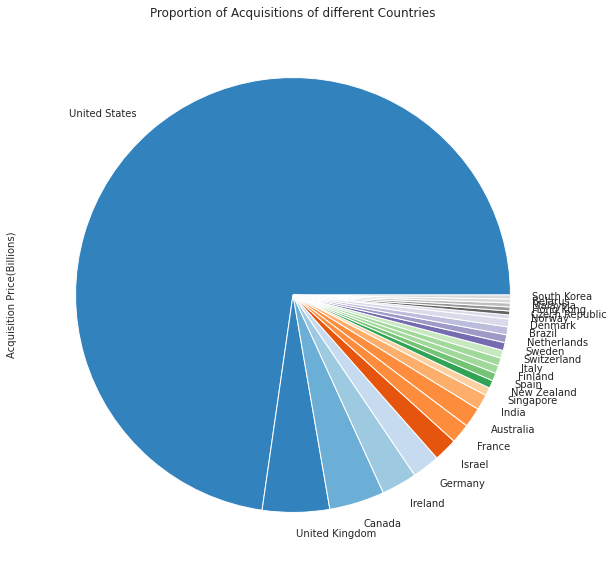

In [ ]:
countries.plot(kind="pie",y="Country",figsize=(15,10), colormap = "tab20c", ylabel='Acquisition Price(Billions)',
                      title='Proportion of Acquisitions of different Countries', legend='')
#plt.figure(figsize=(15,10))
#barh(x="countries", y='Total', data=countries,palette = "Blues_r")
#plt.title('Number of Acquisitions in different Countries')
#plt.xticks(rotation=90)
#plt.xlabel('Countries')
#plt.ylabel('Total Acquisitions')

A disproportionately large number of companies are being acquired by the United States, which is nearly more than 5 times compared to the rest of world. This is then followed by the United Kingdom, Canada and Ireland, which, despite the large gap with the United States, also have a higher number of acquisitions compared to the other countries in the world. 

In [ ]:
years = pd.DataFrame(df['Acquisition Year'].value_counts()).reset_index().rename({'index': 'years', 'Acquisition Year': 'Total'}, axis=1)
years["years"] = years["years"].astype("int64")
years = years.sort_values("years")

In [ ]:
months = pd.DataFrame(df['Acquisition Month'].value_counts()).reset_index().rename({'index': 'months', 'Acquisition Month': 'Total'}, axis=1).set_index('months')
months.index = pd.CategoricalIndex(months.index, categories=['Jan', 'Feb', 'Mar', 'Apr','May',
                                          'Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
months = months.sort_index()

Text(0.5, 1.0, 'Number of Acquisitions in different months')

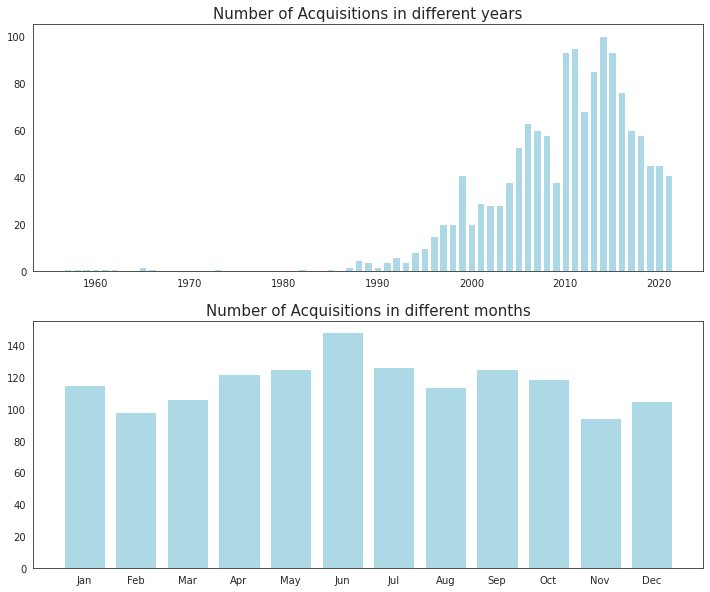

In [ ]:
fig, axes = plt.subplots(2, figsize=(12,10))
axes[0].bar(years.years, years.Total,color = "lightblue")
axes[0].set_title("Number of Acquisitions in different years",fontsize = 15)
axes[1].bar(months.index, months.Total,color = "lightblue")
axes[1].set_title("Number of Acquisitions in different months",fontsize = 15)


In [ ]:
#plt.figure(figsize=(15,10)) 
#sns.barplot(x="years", y='Total', data=years,color = "lightblue") 
#plt.title('Number of Acquisitions in different years') 
#plt.xticks(rotation=90) 
#plt.xlabel('Years') 
#plt.ylabel('Total Acquisitions')

#sns.barplot(x=months.index, y='Total', data=months,color = "lightblue")
#plt.title('Number of Acquisitions in different months')
#plt.xlabel('Months')
#plt.ylabel('Total Acquisitions')

It can be observed that the largest number of companies being acquired was in 2014, while the number decreased sharply in the following years. The years with the lowest number of acquisitions were from 1987 to 1992, which can be interpreted as the budding period of some major market giants.


It seems that most acquisitions take place during the summer months, specifically June, July and May. The reason behind this is probably due to these technology companies deciding to bargain during the months when sales of the acquired companies are low.


###Subtask-2: To gain insights into M&A patterns based on parent companies 
###- Which company has the highest number of acquisitions?
###- What is the average spend of each parent company during its acquisitions?

In [ ]:
companies = pd.DataFrame(df['Parent Company'].value_counts()).reset_index().rename({'index': 'Parent Company', 'Parent Company': 'Acquisitions'}, axis=1)

In [ ]:
companies = df[["Acquisition Price","Parent Company"]].groupby(["Parent Company"])
counts = companies.size().to_frame(name='Acquisitions')
companies_aq = counts.join(companies.agg({'Acquisition Price': 'mean'}).rename(columns={'Acquisition Price': 'Acquisition Price_mean'}))
companies_aq.sort_values("Acquisitions",ascending=False,inplace=True)
companies_aq.reset_index(inplace=True)
companies_aq["Acquisition price_mean(millon USD)"]=round(companies_aq["Acquisition Price_mean"]/1000000,2)
companies_aq.drop(companies_aq.columns[2], axis=1, inplace=True)

In [ ]:
companies_aq

,Parent Company,Acquisitions,Acquisition price_mean(millon USD)
0,Microsoft,258,1660.03
1,Google,244,172.74
2,Ibm,182,1849.16
3,Hp,129,2236.60
4,Apple,123,134.39
5,Amazon,108,841.69
6,Facebook,93,933.26
7,Twitter,65,3695.23
8,Ebay,63,449.34
9,Adobe,52,1191.62


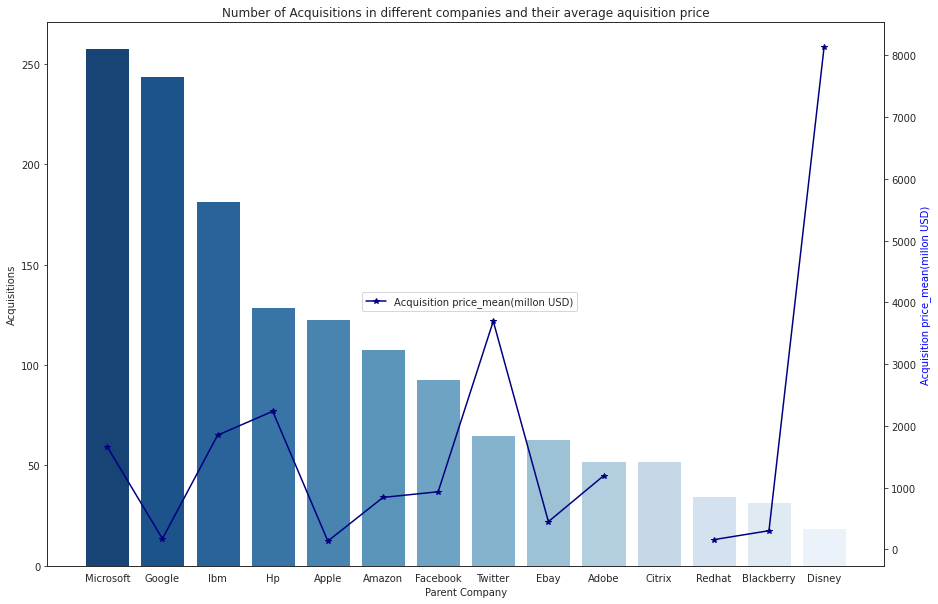

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))
plt.title('Number of Acquisitions in different companies and their average aquisition price')
ax = sns.barplot(x='Parent Company', y='Acquisitions', data=companies_aq,palette = "Blues_r")
ax2 = ax.twinx()
companies_aq.plot(x='Parent Company', y='Acquisition price_mean(millon USD)', ax=ax2, legend=False,color='navy',linestyle='-', marker='*')
ax2.figure.legend(loc=("center"))
# giving labels to the axises
ax.set_xlabel('Parent Company')
ax.set_ylabel('Acquisitions')
# secondary y-axis label
ax2.set_ylabel('Acquisition price_mean(millon USD)', color = 'b')

plt.show()

It appears that Microsoft and Google are the leading acquirers, with over 200 acquisitions. We surmise that it is because companies that are more focused on computer software have more acquisition activity. Perhaps this is because companies that specialize in computer software generate more revenue to support these acquisitions. It is interesting to see that HP and IBM have acquired more companies than Apple, Amazon and Facebook-who are more profitable. 

Disney, which has made the fewest acquisitions of any technology company, has the highest average spending. Disney's average spending is higher than other tech companies, such as Apple and Google. A similar situation occurred with Twitter. We presume that perhaps companies like Disney and Twitter do not tend to cast their nets around to complete multiple acquisitions, but prefer to take a selection of high bid products. 


###Subtask-3: Which products were derived from 10 highest number of company acquisitions and what are their average acquisition price? For each product, find the acquisition with largest acquisition price.

In [ ]:
gb = df[["Derived Products","Acquisition Price","Parent Company"]].groupby(["Derived Products","Parent Company"])
counts = gb.size().to_frame(name='counts')
product_price = counts.join(gb.agg({'Acquisition Price': 'mean'}).rename(columns={'Acquisition Price': 'Acquisition Price_mean'})).join(gb.agg({'Acquisition Price': 'count'}).rename(columns={'Acquisition Price': 'Acquisition Price_count'}))
product_price.sort_values("counts",ascending=False,inplace=True)
product_price.reset_index(inplace=True)
product_price["Acquisition price_mean(millon USD)"]=round(product_price["Acquisition Price_mean"]/1000000,2)

In [ ]:
product_price.drop(product_price.columns[3], axis=1, inplace=True)

In [ ]:
product_price[:10]

,Derived Products,Parent Company,counts,Acquisition Price_count,Acquisition price_mean(millon USD)
0,Google Cloud Platform,Google,22,3,368.33
1,Android,Google,19,4,37.00
2,Amazon Web Services,Amazon,17,5,79.00
3,YouTube,Google,12,1,15.00
4,X,Google,9,0,NaN
5,Google Maps,Google,9,4,60.25
6,Google+,Google,7,1,100.00
7,Google Docs,Google,7,1,25.00
8,Oculus Studio,Facebook,5,0,NaN
9,Nest Labs,Google,5,1,555.00


In [ ]:
top10 = list(product_price[:10]["Derived Products"])

In [ ]:
highaquisitionprice = df.loc[(df["Derived Products"].isin(top10)) & (df["Acquisition Price"].notnull()),['Parent Company', 'Acquisition Year', 'Acquisition Month', 'Acquired Company', 'Business', 'Acquisition Price',"Derived Products"]]
highaquisitionprice[['Acquisition Year',"Acquisition Price"]] = highaquisitionprice[['Acquisition Year',"Acquisition Price"]].astype("int64")

In [ ]:
highaquisitionprice = highaquisitionprice.loc[highaquisitionprice.groupby(["Derived Products"])["Acquisition Price"].idxmax()] 
highaquisitionprice.sort_values("Acquisition Price",ascending=False,inplace=True)

In [ ]:
highaquisitionprice["Acquisition price(millon USD)"]=highaquisitionprice["Acquisition Price"]/1000000

In [ ]:
highaquisitionprice.reindex(columns=["Derived Products",'Parent Company', 'Acquisition Year', 'Acquisition Month', 'Acquired Company', 'Acquisition price(millon USD)','Business']).reset_index()

,index,Derived Products,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Acquisition price(millon USD),Business
0,620,Google Cloud Platform,Google,2016,Sep,Apigee,625.0,API management and predictive analytics
1,580,Nest Labs,Google,2014,Jun,Dropcam,555.0,Home monitoring
2,280,Amazon Web Services,Amazon,2019,Jan,CloudEndure,250.0,NaN
3,658,Google Maps,Google,2020,Jan,Pointy,163.0,Local retail inventory feeds
4,535,Google+,Google,2012,Jun,Meebo,100.0,Social networking
5,442,Android,Google,2005,Aug,Android,50.0,Mobile operating system
6,484,Google Docs,Google,2010,Mar,DocVerse,25.0,Microsoft Office files sharing site
7,473,YouTube,Google,2008,Jul,Omnisio,15.0,Online video


###Subtask-4: What have the popular businesses in M&A changed in the last 20 years? 

In [ ]:
#Since the "business" is too specific, we have to recategorize it into a more general area
df['Business'] = df['Business'].str.replace(r'Acquisition to expand|Acquisition to help|Acquisition enhances','')
df["business_area"] = df["Business"].str.split().str[0]

In [ ]:
business_year = df.groupby(['Acquisition Year','business_area',"Business"]).count()
business_year = business_year.reset_index()

In [ ]:
business_year['Acquisition Year'] = business_year['Acquisition Year'].astype("int64")

In [ ]:
#divide the data into two different groups.
business_year = business_year.loc[business_year["Acquisition Year"]>1999,["Acquisition Year","business_area","Business"]]
business_year10_21 = business_year.loc[business_year["Acquisition Year"]>2009,["Acquisition Year","business_area","Business"]]
business_year00_09 = business_year.loc[business_year["Acquisition Year"]<=2009,["Acquisition Year","business_area","Business"]]

In [ ]:
business_year_df00_09 = business_year00_09["business_area"].value_counts()
business_df00_09 = business_year_df00_09.reset_index()
business_df00_09 = business_df00_09.rename({'index': 'business_area', 'business_area': 'Total'}, axis=1)

business_year_df10_21 = business_year10_21["business_area"].value_counts()
business_df10_21 = business_year_df10_21.reset_index()
business_df10_21 = business_df10_21.rename({'index': 'business_area', 'business_area': 'Total'}, axis=1)

Text(0.5, 1.0, '10 Most Popular Business area To Acquire')

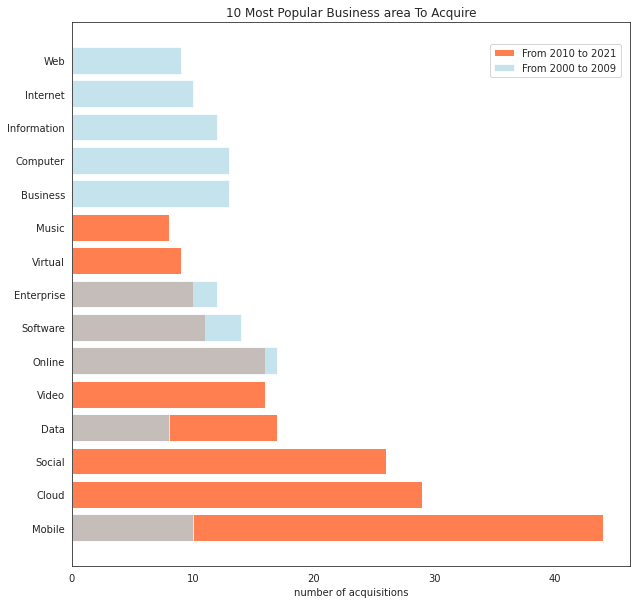

In [ ]:
plt.figure(figsize=(10,10))
plt.barh(business_df10_21[:10].business_area,business_df10_21[:10].Total,color='coral', alpha=1)
plt.barh(business_df00_09[:10].business_area,business_df00_09[:10].Total, color='lightblue',alpha=0.7)

plt.xlabel("number of acquisitions")
plt.legend(["From 2010 to 2021", "From 2000 to 2009"], loc=(0.75,0.9))
plt.title("10 Most Popular Business area To Acquire")

In [ ]:
business_year_df00_09 = business_year00_09['Business'].value_counts()
business_df00_09 = business_year_df00_09.reset_index()
business_df00_09 = business_df00_09.rename({'index': 'Business', 'Business': 'Total'}, axis=1)

business_year_df10_21 = business_year10_21['Business'].value_counts()
business_df10_21 = business_year_df10_21.reset_index()
business_df10_21 = business_df10_21.rename({'index': 'Business', 'Business': 'Total'}, axis=1)

Text(0.5, 1.0, '10 Most Popular Business To Acquire')

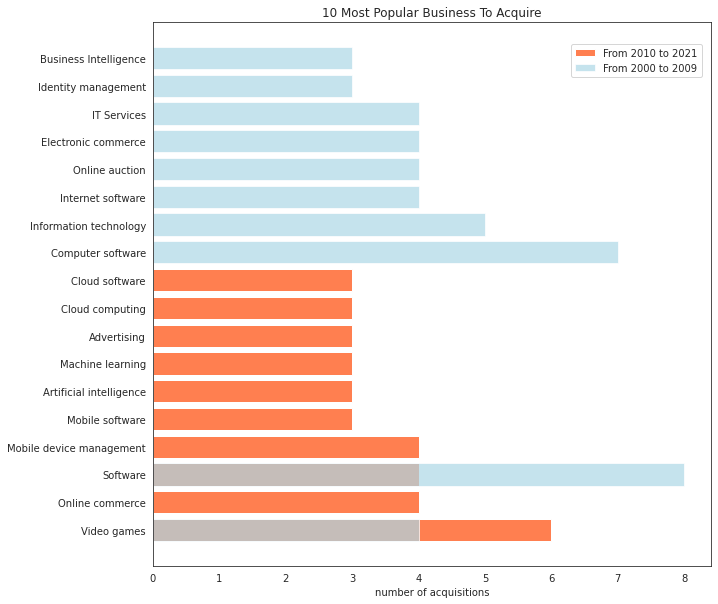

In [ ]:
sns.set_style('white')
plt.figure(figsize=(10,10))
plt.barh(business_df10_21[:10].Business,business_df10_21[:10].Total,color='coral', alpha=1)
plt.barh(business_df00_09[:10].Business,business_df00_09[:10].Total, color='lightblue',alpha=0.7)

plt.xlabel("number of acquisitions")
plt.legend(["From 2010 to 2021", "From 2000 to 2009"], loc=(0.75,0.9))
plt.title("10 Most Popular Business To Acquire")

###Subtask-5: Will big acquisitions influence the stock prices of the acquired company? 

In [ ]:
biggest_single_acquisition = df.sort_values(by='Acquisition Price', ascending=False)[0:10].reset_index(drop=True)
biggest_single_acquisition[['Acquisition Year',"Acquisition Price"]] = biggest_single_acquisition[['Acquisition Year',"Acquisition Price"]].astype("int64")
biggest_single_acquisition["Acquisition price(millon USD)"]=round(biggest_single_acquisition["Acquisition Price"]/1000000,2)
biggest_single_acquisition.drop(['ID',"Country",'Category',"Derived Products","Acquisition Price"], axis=1, inplace=True)

In [ ]:
biggest_single_acquisition.reindex(columns=['Parent Company', 'Acquisition Year', 'Acquisition Month', 'Acquired Company', 'Acquisition price(millon USD)'])

,Parent Company,Acquisition Year,Acquisition Month,Acquired Company,Acquisition price(millon USD)
0,Disney,2019,Mar,21st Century Fox,71300.0
1,Twitter,2015,Mar,Periscope,50100.0
2,Ibm,2019,Jul,Red Hat,34000.0
3,Microsoft,2016,Dec,LinkedIn,26200.0
4,Hp,2002,May,Compaq,25000.0
5,Microsoft,2021,Apr,Nuance Communications,19700.0
6,Facebook,2014,Feb,WhatsApp,19000.0
7,Disney,1996,Feb,Capital Cities/ABC Inc.,19000.0
8,Hp,2008,Aug,Electronic Data Systems,13900.0
9,Amazon,2017,Jun,Whole Foods Market,13700.0


In [ ]:
biggest_single_acquisition.to_csv("biggest_single_acquisition.csv")

Among the acquired companies in the ten largest acquisitions, only LinkedIn, Nuance Communications and Whole Foods Market were listed companies before the giant M&A.Therefore, I will only focus on their stock price change when the companys made an anouncement about the M&A.

On Jun 13, 2016, Microsoft and LinkedIn Corporation announced they have entered into a definitive agreement under which Microsoft will acquire LinkedIn for $196 per share in an all-cash transaction valued at 26.2 billion dollars, inclusive of LinkedIn’s net cash. 
https://blogs.microsoft.com/blog/2016/06/13/microsoft-to-acquire-linkedin/

On April 12, 2021, Microsoft Corp (Nasdaq: MSFT) and Nuance Communications, Inc. (Nasdaq: NUAN) announced they have entered into a definitive agreement under which Microsoft will acquire Nuance for 56.00 dollar per share, implying a 23% premium to the closing price of Nuance on Friday, April 9, in an all-cash transaction valued at $19.7 billion, inclusive of Nuance’s net debt.
https://news.microsoft.com/2021/04/12/microsoft-accelerates-industry-cloud-strategy-for-healthcare-with-the-acquisition-of-nuance/

On Jun 16, 2017, Amazon anounced that it was buying organic grocery chain Whole Foods (WFM) for 13.7 billion dollars in cash. The deal values Whole Foods at 42 dollar a share.
https://media.wholefoodsmarket.com/amazon-to-acquire-whole-foods-market


In [ ]:
mykey = open('mystockkey.txt').read()

In [ ]:
pip install alpha_vantage

     |████████████████████████████████| 1.1 MB 12.1 MB/s 
     |████████████████████████████████| 192 kB 47.5 MB/s 
     |████████████████████████████████| 271 kB 56.1 MB/s 
     |████████████████████████████████| 160 kB 55.9 MB/s 


In [ ]:
from alpha_vantage.timeseries import TimeSeries
ts = TimeSeries(key=mykey, output_format="pandas")

In [ ]:
# LinkedIn (ticker symbol LNKD)
LNKD, meta = ts.get_daily(symbol = "LNKD",outputsize = "full")

# Nuance Communications (ticker symbol  NUAN)
NUAN, meta = ts.get_daily(symbol = "NUAN",outputsize = "full")

# Whole Foods Market	 (ticker symbol WFM)
WFM, meta = ts.get_daily(symbol = "WFM",outputsize = "full")

In [ ]:
LNKD_df = pd.DataFrame(LNKD)
NUAN_df = pd.DataFrame(NUAN)
WFM_df = pd.DataFrame(WFM)

In [ ]:
LNKD_df = LNKD_df.loc[(LNKD_df.index.year==2016)&(LNKD_df.index.month==6)]
LNKD_df.sort_index(ascending=True, inplace=True)
NUAN_df = NUAN_df.loc[(NUAN_df.index.year==2021)&(NUAN_df.index.month==4)]
NUAN_df.sort_index(ascending=True, inplace=True)
WFM_df = WFM_df.loc[(WFM_df.index.year==2017)&(WFM_df.index.month==6)]
WFM_df.sort_index(ascending=True, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


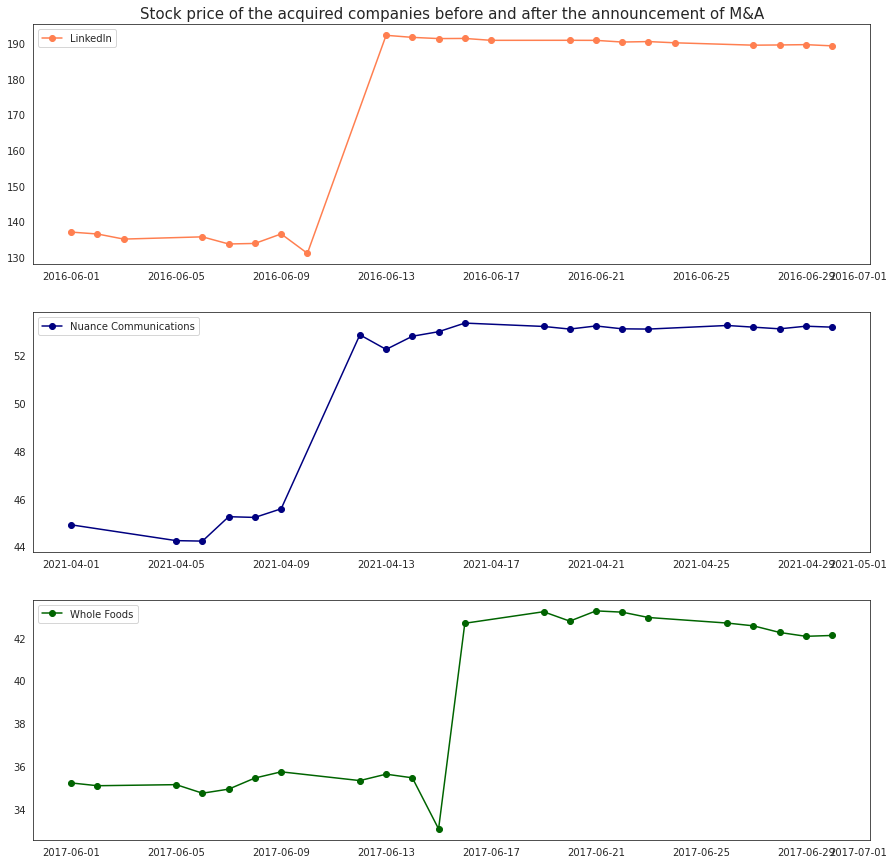

In [ ]:
fig, axes = plt.subplots(3, figsize=(15,15))
axes[0].plot(LNKD_df.index, LNKD_df['4. close'], label = "LinkedIn", color = "coral",linestyle='-', marker='o')
axes[0].set_title("Stock price of the acquired companies before and after the announcement of M&A",fontsize = 15)
axes[0].legend(loc="upper left")
axes[1].plot(NUAN_df.index, NUAN_df['4. close'],label = "Nuance Communications", color = "navy",linestyle='-', marker='o')
axes[1].legend(loc="upper left")
axes[2].plot(WFM_df.index, WFM_df['4. close'],label = "Whole Foods", color = "darkgreen", linestyle='-', marker='o')
axes[2].legend(loc="upper left")
#Stock price of  before and after the announcement about M&A was made